<a href="https://colab.research.google.com/github/gurukjy/preprocessing/blob/main/03_%ED%8C%90%EB%8B%A4%EC%8A%A4_%EB%8D%B0%EC%9D%B4%ED%84%B0%ED%94%84%EB%A0%88%EC%9E%84_%ED%83%90%EC%83%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/title.png' width=500/></center>

# 학습 목표

- 다양한 메소드와 속성을 통해 데이터를 이해할 수 있습니다.
- 결측치(NaN값) 존재 여부를 확인할 수 있습니다.
- 기초 통계 정보를 확인할 수 있습니다.
- 원하는 순서로 정렬해 데이터를 확인할 수 있습니다.
- 기본적인 집계 함수를 사용해 데이터를 이해할 수 있습니다.

# 3. 데이터프레임 탐색

- 파일에서 불러온 데이터의 크기, 내용, 분포, 누락된 값 등을 확인할 수 있어야 합니다.
- 확인된 내용을 통해 데이터 전처리 필요 여부를 결정합니다.
- 데이터를 알아야 데이터를 분석할 수 있습니다.

In [2]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format='retina'

In [3]:
# Titanic 데이터 불러오기
file_path = 'https://raw.githubusercontent.com/Jangrae/csv/master/titanic_simple.csv'
titanic = pd.read_csv(file_path, sep=',')  
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,Southhampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,Southhampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,Southhampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,Southhampton


**[참고] 우선 익숙해져야 할 것들**

- head(): 상위 데이터 확인
- tail(): 하위 데이터 확인
- shape: 데이터프레임 크기
- index: 인덱스 정보 확인
- values: 값 정보 확인
- columns: 열 정보 확인
- dtypes: 열 자료형 확인
- info(): 열에 대한 상세한 정보 확인
- describe(): 기초통계정보 확인

※ **열 정보와 관련된 columns, info()는 시리즈에 대해서는 사용할 수 없습니다.**


## 3.1. 앞, 뒤 일부 데이터, 크기 확인

- **head(*n*), tail(*n*)** 메소드를 사용해 앞 뒤 데이터를 확인합니다.
- 개수를 지정하지 않으면 기본적으로 5개 행이 조회됩니다.

**1) 앞쪽 데이터 확인**

In [4]:
# 첫 5개 행 데이터
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,Southhampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,Southhampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,Southhampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,Southhampton


In [5]:
# 첫 10개 행 데이터
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,Southhampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,Southhampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,Southhampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,Southhampton
5,6,0,3,"Moran, Mr. James",male,NaN,8.4583,Queenstown
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,51.8625,Southhampton
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,21.0750,Southhampton
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,11.1333,Southhampton
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,30.0708,Cherbourg


**2) 뒤쪽 데이터 확인**

In [6]:
# 마지막 5개 행 데이터
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,13.00,Southhampton
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,30.00,Southhampton
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,23.45,Southhampton
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,30.00,Cherbourg
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,7.75,Queenstown


In [7]:
# 마지막 3개 행 데이터
titanic.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,23.45,Southhampton
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,30.00,Cherbourg
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,7.75,Queenstown


**3) 크기 확인**

- **(rows, cols)** 값을 갖는 **튜플** 형태로 확인이 가능합니다.
- 데이터를 분석할 때 처리할 **데이터 양을 확인**하는 목적으로 많이 사용 합니다.

In [8]:
# 행 수와 열 수 확인
titanic.shape

(891, 8)

In [9]:
# 행 수 확인
titanic.shape[0]

891

In [10]:
# 열 수 확인
titanic.shape[1]

8

In [15]:
# 참고 : 크기확인
titanic.size # 898 x 8 = 7128

7128

## 3.2. 열, 행 정보 보기

**1) 인덱스 확인**

In [11]:
# 인덱스 확인
titanic.index

RangeIndex(start=0, stop=891, step=1)

**2) 값 확인**

In [12]:
# 값 확인
titanic.values

array([[1, 0, 3, ..., 22.0, 7.25, 'Southhampton'],
       [2, 1, 1, ..., 38.0, 71.2833, 'Cherbourg'],
       [3, 1, 3, ..., 26.0, 7.925, 'Southhampton'],
       ...,
       [889, 0, 3, ..., nan, 23.45, 'Southhampton'],
       [890, 1, 1, ..., 26.0, 30.0, 'Cherbourg'],
       [891, 0, 3, ..., 32.0, 7.75, 'Queenstown']], dtype=object)

**3) 열 확인**

In [16]:
# 열 확인
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Fare',
       'Embarked'],
      dtype='object')

In [21]:
#소문자로 바꾸기
titanic.columns.str.lower()

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'fare',
       'embarked'],
      dtype='object')

In [20]:
# 첫글자만 대문자
titanic.columns.str.title()

Index(['Passengerid', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Fare',
       'Embarked'],
      dtype='object')

**4) 자료형 확인**
- int64: 정수형 데이터(int)
- float64: 실수형 데이터(float)
- object: 문자열 데이터(string)

In [24]:
# 열 자료형 확인
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
Fare           float64
Embarked        object
dtype: object

In [25]:
# 열 자료형, 값 개수 확인
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   Fare         891 non-null    float64
 7   Embarked     889 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


**5) 기초 통계 정보 확인**
- 개수(count), 평균(mean), 표준편차(std), 최솟값(min), 사분위값(25%, 50%, 75%), 최댓값(max)을 표시합니다.

In [26]:
# 기초 통계 정보
titanic.describe()

,PassengerId,Survived,Pclass,Age,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,32.204208
std,257.353842,0.486592,0.836071,14.526497,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,512.329200


<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' width=120 align="left"/>

[문1] 다음 코드를 실행해서 stock 데이터프레임을 만들고 관련 정보를 확인해 보세요.

In [28]:
# stock 데이터 불러오기
file_path = 'https://raw.githubusercontent.com/Jangrae/csv/master/stock.csv'
stock = pd.read_csv(file_path, sep = ',', header=0, index_col=False)  

# 확인
stock.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2000-01-03,4.017857,3.631696,3.745536,3.997768,133949200,3.470226
1,2000-01-04,3.950893,3.613839,3.866071,3.660714,128094400,3.177650
2,2000-01-05,3.948661,3.678571,3.705357,3.714286,194580400,3.224152
3,2000-01-06,3.821429,3.392857,3.790179,3.392857,191993200,2.945139
4,2000-01-07,3.607143,3.410714,3.446429,3.553571,115183600,3.084645


In [29]:
# 크기 확인
stock.shape

(5031, 7)

In [30]:
# 인덱스 확인
stock.index

RangeIndex(start=0, stop=5031, step=1)

In [31]:
# 열 확인
stock.columns

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [33]:
# 열 자료형, 값 개수 확인
stock.dtypes
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5031 entries, 0 to 5030
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5031 non-null   object 
 1   High       5031 non-null   float64
 2   Low        5031 non-null   float64
 3   Open       5031 non-null   float64
 4   Close      5031 non-null   float64
 5   Volume     5031 non-null   int64  
 6   Adj Close  5031 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 275.3+ KB


In [36]:
# 기초 통계 정보 확인
stock.describe()

,High,Low,Open,Close,Volume,Adj Close
count,5031.000000,5031.000000,5031.000000,5031.000000,5.031000e+03,5031.000000
mean,60.052092,58.916362,59.493094,59.503741,1.149430e+08,55.667863
std,65.302285,64.235383,64.752822,64.800571,9.877368e+07,63.229538
min,0.942143,0.908571,0.927857,0.937143,9.835000e+06,0.813478
25%,5.007500,4.784431,4.907679,4.907143,4.724460e+07,4.259600
50%,29.242857,28.585714,28.911428,28.925714,8.732500e+07,25.108700
75%,100.276428,98.385002,99.165001,99.480000,1.516658e+08,91.943821
max,293.970001,289.519989,291.119995,293.649994,1.855410e+09,292.954712


## 3.3. 정렬해서 보기

- 인덱스를 기준으로 정렬하는 방법과 특정 열을 기준으로 정렬하는 방법이 있습니다.
- **sort_index()** 메소드로 **인덱스**를 기준으로 정렬합니다.
- **sort_values()** 메소드로 **특정 열**을 기준으로 정렬합니다.
- **ascending** 옵션을 설정해 오름차순, 내림차순을 설정할 수 있습니다.
    - ascending=True: 오름차순 정렬(기본값)
    - ascending=False: 내림차순 정렬

**1) 인덱스를 기준으로 정렬**

In [37]:
# 데이터프레임 확인
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,Southhampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,Southhampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,Southhampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,Southhampton


In [38]:
# 인덱스를 기준으로 내림차순 정렬
titanic.sort_index(ascending=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,7.7500,Queenstown
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,30.0000,Cherbourg
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,23.4500,Southhampton
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,30.0000,Southhampton
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,13.0000,Southhampton
...,...,...,...,...,...,...,...,...
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,Southhampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,Southhampton
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,Southhampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,Cherbourg


**2) 열 값을 기준으로 정렬**

- 하나 또는 여러 열을 기준으로 정렬할 수 있습니다.

In [39]:
# Fare 열의 값으로 정렬
titanic.sort_values(by='Fare', ascending=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,512.3292,Cherbourg
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,512.3292,Cherbourg
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,512.3292,Cherbourg
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,263.0000,Southhampton
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,263.0000,Southhampton
...,...,...,...,...,...,...,...,...
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0.0000,Southhampton
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0.0000,Southhampton
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0.0000,Southhampton
732,733,0,2,"Knight, Mr. Robert J",male,NaN,0.0000,Southhampton


In [40]:
# Fare, Age 열의 값으로 정렬
titanic.sort_values(by=['Fare', 'Age'], ascending=[False, True])

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,512.3292,Cherbourg
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,512.3292,Cherbourg
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,512.3292,Cherbourg
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,263.0000,Southhampton
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,263.0000,Southhampton
...,...,...,...,...,...,...,...,...
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0.0000,Southhampton
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0.0000,Southhampton
674,675,0,2,"Watson, Mr. Ennis Hastings",male,NaN,0.0000,Southhampton
732,733,0,2,"Knight, Mr. Robert J",male,NaN,0.0000,Southhampton


<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' width=120 align="left"/>

[문1] 아래 코드를 실행해서 stock 데이터프레임을 다시 만드세요.

In [41]:
# stock 데이터 불러오기
file_path = 'https://raw.githubusercontent.com/Jangrae/csv/master/stock.csv'
stock = pd.read_csv(file_path, sep = ',', header=0, index_col='Date')  
stock.index.name = None

# 확인
stock.head(10)

,High,Low,Open,Close,Volume,Adj Close
2000-01-03,4.017857,3.631696,3.745536,3.997768,133949200,3.470226
2000-01-04,3.950893,3.613839,3.866071,3.660714,128094400,3.177650
2000-01-05,3.948661,3.678571,3.705357,3.714286,194580400,3.224152
2000-01-06,3.821429,3.392857,3.790179,3.392857,191993200,2.945139
2000-01-07,3.607143,3.410714,3.446429,3.553571,115183600,3.084645
2000-01-10,3.651786,3.383929,3.642857,3.491071,126266000,3.030393
2000-01-11,3.549107,3.232143,3.426339,3.312500,110387200,2.875386
2000-01-12,3.410714,3.089286,3.392857,3.113839,244017200,2.702940
2000-01-13,3.526786,3.303571,3.374442,3.455357,258171200,2.999391
2000-01-14,3.651786,3.549107,3.571429,3.587054,97594000,3.113708


[문2] 인덱스를 기준으로 내림차순 정렬해서 조회하세요.

In [42]:
# 인덱스를 기준으로 내림차순 정렬
stock.sort_index(ascending=False)

,High,Low,Open,Close,Volume,Adj Close
2019-12-31,293.679993,289.519989,289.929993,293.649994,25201400,292.954712
2019-12-30,292.690002,285.220001,289.459992,291.519989,36028600,290.829773
2019-12-27,293.970001,288.119995,291.119995,289.799988,36566500,289.113831
2019-12-26,289.980011,284.700012,284.820007,289.910004,23280300,289.223602
2019-12-24,284.890015,282.920013,284.690002,284.269989,12119700,283.596924
...,...,...,...,...,...,...
2000-01-07,3.607143,3.410714,3.446429,3.553571,115183600,3.084645
2000-01-06,3.821429,3.392857,3.790179,3.392857,191993200,2.945139
2000-01-05,3.948661,3.678571,3.705357,3.714286,194580400,3.224152
2000-01-04,3.950893,3.613839,3.866071,3.660714,128094400,3.177650


[문3] Close 열을 기준으로 오름차순 정렬해서 조회하세요.

In [43]:
# Close 열을 기준으로 오름차순 정렬
stock.sort_values(by='Close',ascending=True)

,High,Low,Open,Close,Volume,Adj Close
2003-04-17,0.946429,0.908571,0.942857,0.937143,154064400,0.813478
2003-04-21,0.942143,0.927143,0.937857,0.938571,38080000,0.814718
2003-04-11,1.031429,0.923571,1.003571,0.942857,348177200,0.818438
2003-04-16,0.976429,0.922857,0.927857,0.945714,254044000,0.820919
2003-04-25,0.970000,0.945000,0.961429,0.953571,51329600,0.827739
...,...,...,...,...,...,...
2019-12-24,284.890015,282.920013,284.690002,284.269989,12119700,283.596924
2019-12-27,293.970001,288.119995,291.119995,289.799988,36566500,289.113831
2019-12-26,289.980011,284.700012,284.820007,289.910004,23280300,289.223602
2019-12-30,292.690002,285.220001,289.459992,291.519989,36028600,290.829773


[문4] Close 열을 기준으로 내림차순 정렬해서 10개 행만 조회하세요.

In [44]:
# Close 열을 기준으로 내림차순 정렬
stock.sort_values(by='Close',ascending=False).head(10)

,High,Low,Open,Close,Volume,Adj Close
2019-12-31,293.679993,289.519989,289.929993,293.649994,25201400,292.954712
2019-12-30,292.690002,285.220001,289.459992,291.519989,36028600,290.829773
2019-12-26,289.980011,284.700012,284.820007,289.910004,23280300,289.223602
2019-12-27,293.970001,288.119995,291.119995,289.799988,36566500,289.113831
2019-12-24,284.890015,282.920013,284.690002,284.269989,12119700,283.596924
2019-12-23,284.250000,280.369995,280.529999,284.000000,24643000,283.327576
2019-12-17,281.769989,278.799988,279.570007,280.410004,28539600,279.746094
2019-12-19,281.179993,278.950012,279.500000,280.019989,24592300,279.356995
2019-12-16,280.790008,276.980011,277.000000,279.859985,32046500,279.197357
2019-12-18,281.899994,279.119995,279.799988,279.739990,29007100,279.077667


## 3.4. 기본 집계

- 데이터를 좀더 이해하기 위해 고유값, 합, 평균, 최댓값, 최솟값 등을 확인합니다.

### 3.4.1. 고유값 확인

- 범주형 열(열이 가진 값이 일정한 값인 경우, 성별, 등급 등)인지 확인할 때 사용합니다.

**1) 고유값 확인**

- unique() 메소드로 고유값을 확인하며, 결괏값은 배열 형태가 됩니다.

In [45]:
# Embarked 열 고유값 확인
titanic['Embarked'].unique()

array(['Southhampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

**2) 고유값과 개수 확인**

- value_counts() 메소드로 고유값과 그 개수를 확인하며, 결괏값은 시리즈 형태가 됩니다.

In [46]:
# Embarked 열 고유값 개수 확인, NaN 값 제외
titanic['Embarked'].value_counts()

Southhampton    644
Cherbourg       168
Queenstown       77
Name: Embarked, dtype: int64

- dropna=False 옵션을 지정하면 NaN 값 개수도 확인할 수 있습니다.

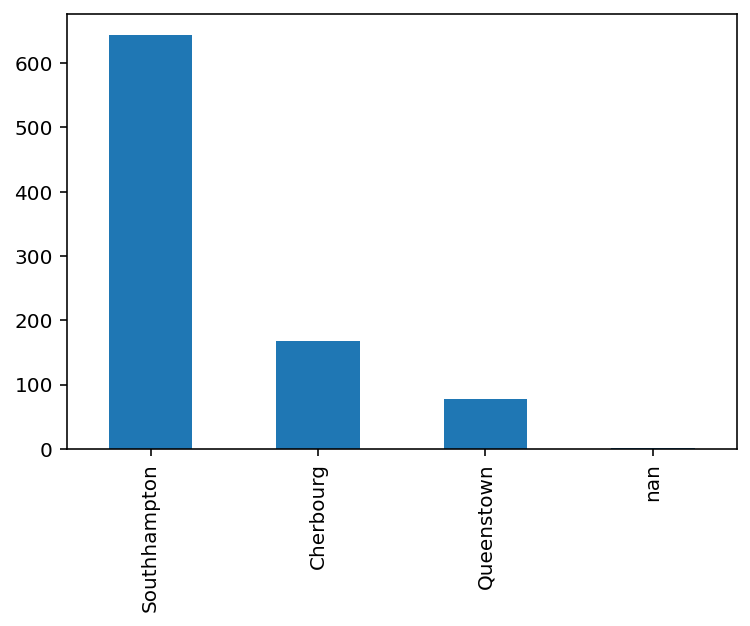

In [53]:
# Embarked 열 고유값 개수 확인, NaN값 포함
titanic['Embarked'].value_counts(dropna=False).plot(kind='bar')

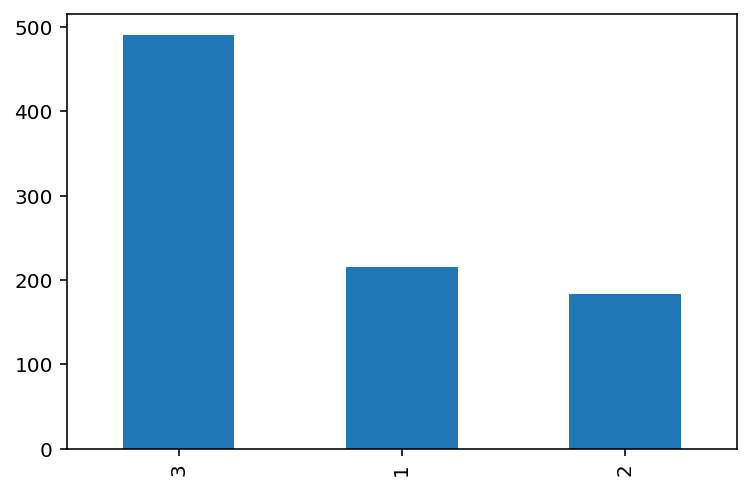

In [52]:
# Pclass 열 고유값 개수 확인
titanic['Pclass'].value_counts(dropna=False).plot(kind='bar')

### 3.4.2. 기본 통계 메소드 사용

- 데이터를 1차 집계 한 후 분석을 진행하는 경우가 많으므로 필히 알아두어야 할 내용입니다.
- 이후에 배우는 Groupby 기능에서 같이 사용됩니다.

**1) 합, 평균값**

In [49]:
# 모든 열 합계 조회
titanic.sum()

PassengerId                                               397386
Survived                                                     342
Pclass                                                      2057
Name           Braund, Mr. Owen HarrisCumings, Mrs. John Brad...
Sex            malefemalefemalefemalemalemalemalemalefemalefe...
Age                                                      21205.2
Fare                                                     28693.9
dtype: object

In [54]:
# 모든 열 평균값 조회
titanic.mean()

PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
Fare            32.204208
dtype: float64

In [55]:
# Fare 열 합계 조회
titanic['Fare'].sum()

28693.9493

In [56]:
# Age, Fare 열 평균값 확인
titanic[['Age', 'Fare']].mean()

Age     29.699118
Fare    32.204208
dtype: float64

**2) 최댓값, 최솟값**

In [57]:
# 모든 열 최댓값 조회
titanic.max()

PassengerId                            891
Survived                                 1
Pclass                                   3
Name           van Melkebeke, Mr. Philemon
Sex                                   male
Age                                     80
Fare                               512.329
dtype: object

In [58]:
# 모든 행 최솟값 조회
titanic.min()

PassengerId                      1
Survived                         0
Pclass                           1
Name           Abbing, Mr. Anthony
Sex                         female
Age                           0.42
Fare                             0
dtype: object

In [59]:
# Fare 열 최댓값 조회
titanic['Fare'].max()

512.3292

In [60]:
# Age, Fare 열 최솟값 조회
titanic[['Age', 'Fare']].min()

Age     0.42
Fare    0.00
dtype: float64

**3) 분산, 표준편차, 중앙값**

In [61]:
# 모든 열 분산 조회
titanic.var()

PassengerId    66231.000000
Survived           0.236772
Pclass             0.699015
Age              211.019125
Fare            2469.436846
dtype: float64

In [62]:
# 모든 행 표준편차 조회
titanic.std()

PassengerId    257.353842
Survived         0.486592
Pclass           0.836071
Age             14.526497
Fare            49.693429
dtype: float64

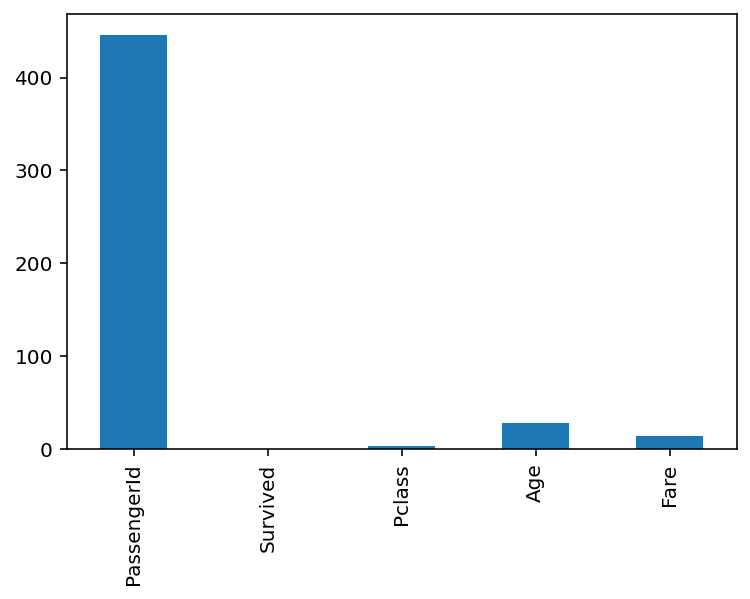

In [65]:
# 모든 행 중앙값 조회
titanic.median().plot(kind='bar')

## 3.5. 시각화로 데이터 탐색

- 숫자로 표시된 정보 보다는 시각화되어 차트로 표시되는 정보가 이해하기 쉽습니다.
- 특히 데이터 분포는 시각화해서 확인하는 것이 좋습니다.

### 3.5.1. 히스토그램

- 데이터 분포를 확인하는 가장 대표적인 방법이 히스토그램입니다.
- plot() 메소드에 **kind='hist'** 옵션을 설정해 히스토그램을 표시할 수 있습니다.

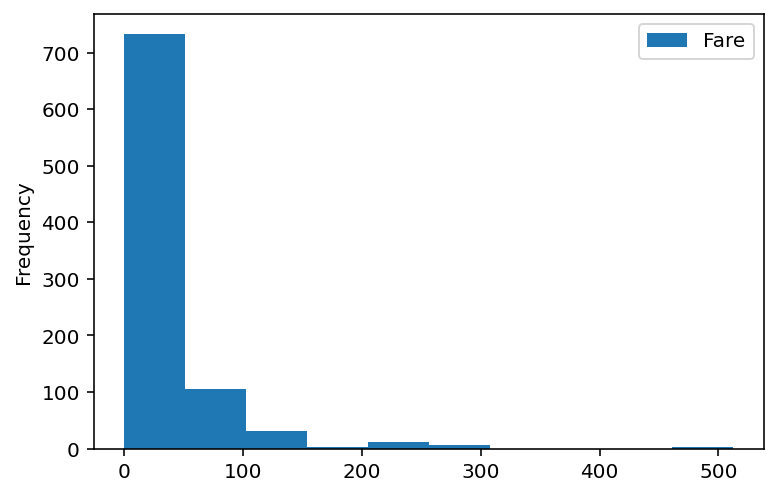

In [67]:
# Fare 열 데이터 분포 확인
titanic.plot(kind='hist', y='Fare')
plt.show()

- **bins** 옵션을 지정해 좀더 자세한 분포를 확인할 수 있습니다.
- bins 옵션 기본값은 10입니다.

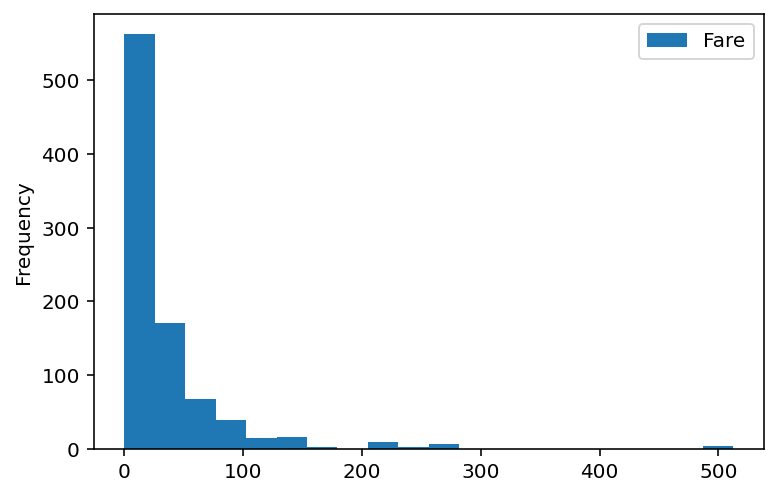

In [68]:
# Fare 열 데이터 분포 확인
titanic.plot(kind='hist', y='Fare', bins=20)
plt.show()

In [69]:
# bins에 의해 그래프가 달라지므로 일관성이 없다!!!

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' width=120 align="left"/>

[문1] Age 열 데이터 분포를 히스토그램으로 확인하세요.

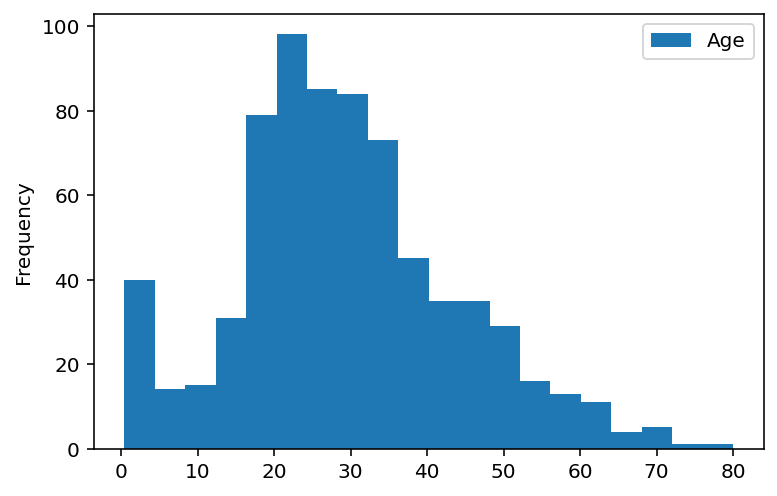

In [71]:
# Age 열 데이터 분포 확인
titanic.plot(kind='hist', y='Age', bins=20)
plt.show()


### 3.5.2. 커널밀도추정(kde) 그래프

- 히스토그램은 bins 옵션에 따라 표시되는 모양이 달라 일관성이 없습니다.
- 이런 이유로 항상 같은 모양을 보이는 kde(커널밀도추정) 그래프를 사용하는 경우가 많습니다.
- plot() 메소드에 **kind='kde'** 옵션을 설정해 kde 그래프를 표시할 수 있습니다.

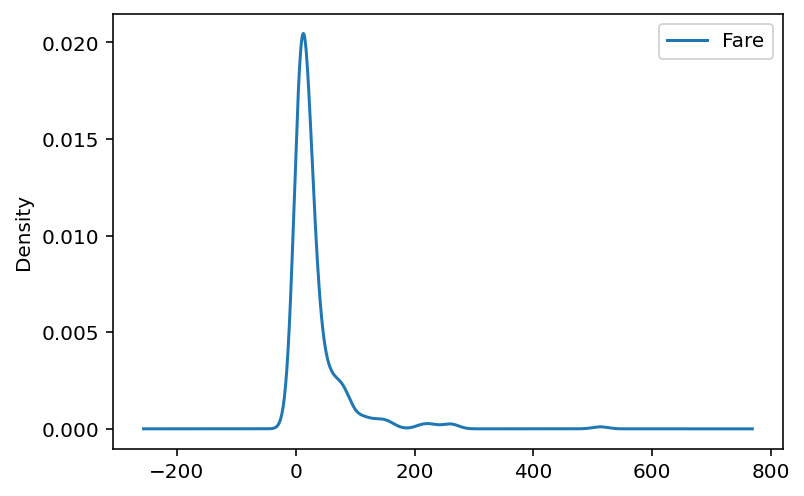

In [72]:
# Fare 열 데이터 분포 확인
titanic.plot(kind='kde', y='Fare')
plt.show()

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' width=120 align="left"/>

[문1] Age 열 데이터 분포를 kde 그래프로 확인하세요.

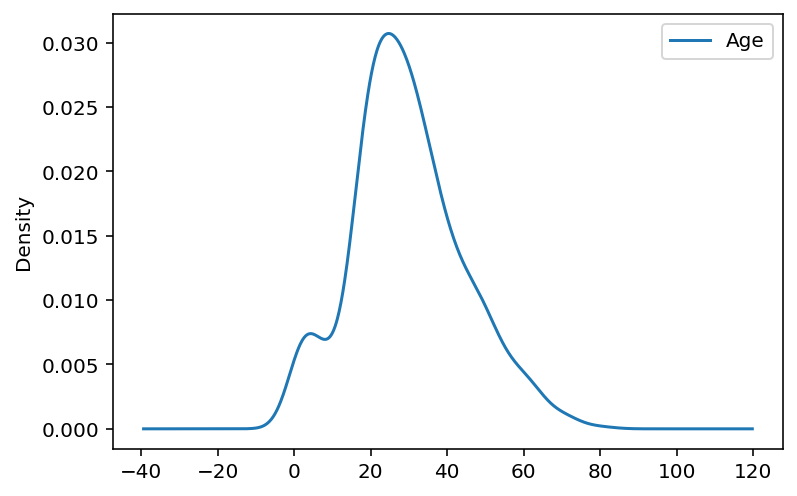

In [73]:
# Age 열 데이터 분포 확인

titanic.plot(kind='kde', y='Age')
plt.show()

### 3.5.3. 박스 플롯

- 박스 플롯은 다소 낯선 그래프 모양을 보여줍니다.
- 하지만 그 어떤 그래프보다 데이터 분포를 상세히 확인할 수 있습니다.
- plot() 메소드에 **kind='box'** 옵션을 설정해 박스 플롯을 표시할 수 있습니다.

**[참고] Box Plot 이해하기**

<img src='https://raw.githubusercontent.com/jangrae/img/master/boxplot01.png' align = "left" width=360/>

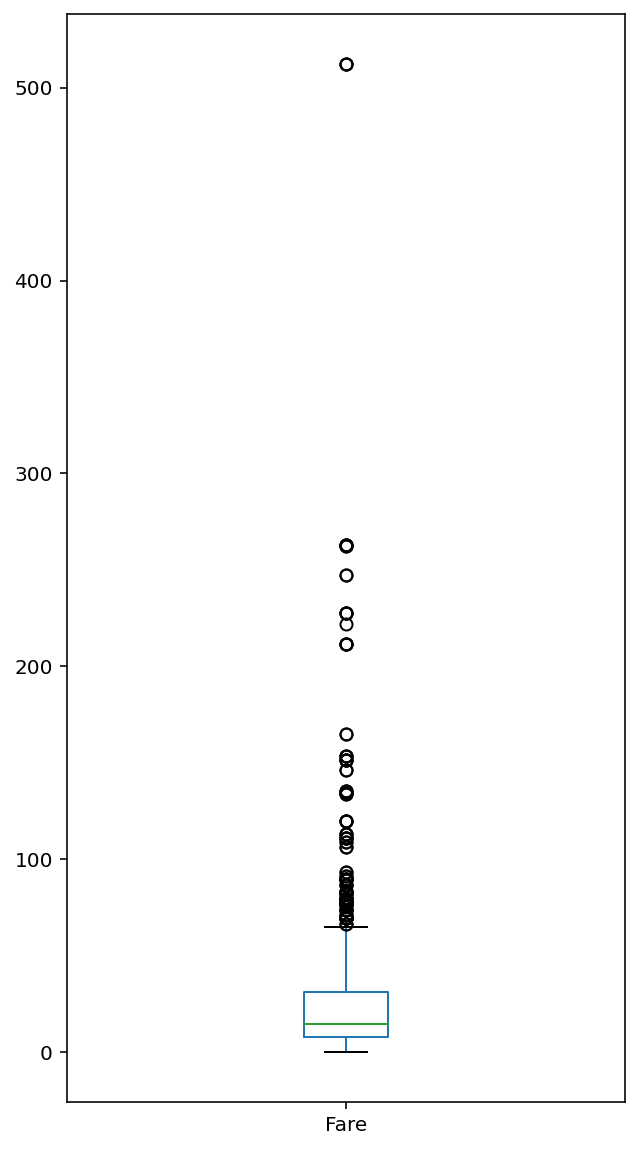

In [76]:
# Fare 열 데이터 분포 확인
titanic.plot(kind='box', y='Fare',figsize=(5,10))
plt.show()

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' width=120 align="left"/>

[문1] Age 열 데이터 분포를 박스 플롯으로 확인하세요.

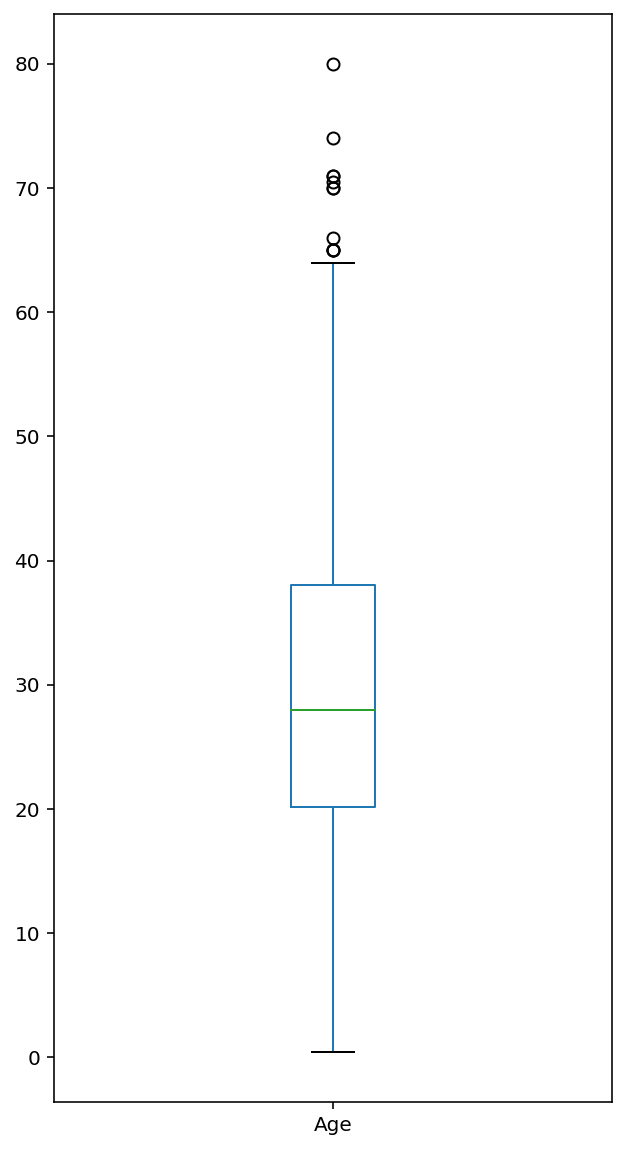

In [77]:
# Age 열 데이터 분포 확인

titanic.plot(kind='box', y='Age',figsize=(5,10))
plt.show()

<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/end.png' width=300/></center>